##  Dependencies and Setup

In [2]:
  # Importing library
%matplotlib inline

In [3]:
  # Importing external packages
import numpy as np
import matplotlib.patches as mpatches
import requests
import pandas as pd
import seaborn as sns

In [4]:
  # File to Load 
ticket_data = "output_data//cleansed_dataframe.xlsx"

In [5]:
  # Read the Ticket file and store Pandas data frame
df_ticket_cl = pd.read_excel(ticket_data)

  # Print out in the window
df_ticket_cl.head()

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Due_Date,Due Time,Due Year,Due Month,Due Day,Due_day_of_week,Closed_Date,Closed Time,Pended_Date,Pended Time
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/05/18 22:07,11/20/18 21:00,11/16/18 07:45,MyHRW,...,2018-11-20,21:00:00,2018,11,20,Tuesday,2018-11-16,07:45:00,NaT,NaN
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/05/18 23:00,11/13/18 22:01,11/05/18 23:21,MyHRW,...,2018-11-13,22:01:00,2018,11,13,Tuesday,2018-11-05,23:21:00,NaT,NaN
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/06/18 04:18,11/07/18 22:01,11/06/18 04:52,MyHRW,...,2018-11-07,22:01:00,2018,11,7,Wednesday,2018-11-06,04:52:00,NaT,NaN
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,11/06/18 04:58,11/08/18 22:01,11/06/18 05:04,MyHRW,...,2018-11-08,22:01:00,2018,11,8,Thursday,2018-11-06,05:04:00,NaT,NaN
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/06/18 06:06,11/13/18 22:01,11/06/18 07:31,MyHRW,...,2018-11-13,22:01:00,2018,11,13,Tuesday,2018-11-06,07:31:00,NaT,NaN


### Yearly Count

The following graph has a year by year breakdown of tickets.

In [6]:
   # Declare DataFrame
df_ticket_cl= df_ticket_cl.groupby('Creation Year')
   # Get the total number of tickets by Year 
number_of_tickets_per_year = df_ticket_cl['Company'].count()
   # Output DataFrame
tickets_per_year_df = pd.DataFrame(data = number_of_tickets_per_year,index = None).reset_index()
tickets_per_year_df = tickets_per_year_df.rename(columns = {"Creation Year":"Year","Company":"Total Number of Tickets"})
   # Print out in the window 
tickets_per_year_df

,Year,Total Number of Tickets
0,2018,39519
1,2019,25167


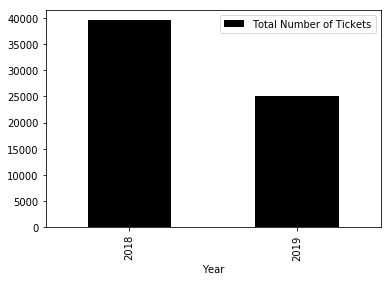

In [7]:
  # Create the bar chart
ax = tickets_per_year_df.plot.bar(x='Year', y='Total Number of Tickets', rot=90, color='black')
#   # Save Figure
# #plt.savefig("Images/x_Tickets_per_Year.png",bbox_inches = "tight")

###  Monthly count

The following graph has a month by month breakdown.

In [8]:
   # Declare DataFrame
df_ticket_cl= df_ticket_cl.groupby('Creation Month')
   # Get the total number of tickets by Month 
number_of_tickets_per_month = df_ticket_cl['Company'].count()
   # Output DataFrame
tickets_per_month_df = pd.DataFrame(data = number_of_tickets_per_month,index = None).reset_index()
tickets_per_month_df = tickets_per_month_df.rename(columns = {"Creation Month":"Month","Company":"Total Number of Tickets"})
   # Print out in the window 
tickets_per_month_df

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [14]:
#   # Create the bar chart
# ax = tickets_per_year_df.plot.bar(x='Month', y='Total Number of Tickets', rot=90, color='b')
#   # Save Figure
# #plt.savefig("Images/x_Tickets_per_Month.png",bbox_inches = "tight")
#   # Print out in the window
# plt.show()

###  Daily Count

The most popular time of the week to the employee call HRServices is...

In [17]:
#    # Declare DataFrame
# df_ticket_cl= df_ticket_cl.groupby('Creation_day_of_week')
#    # Get the total number of tickets by Day 
# number_of_tickets_per_day = df_ticket_cl['Company'].count()
#    # Output DataFrame
# tickets_per_day_df = pd.DataFrame(data = number_of_tickets_per_day,index = None).reset_index()
# tickets_per_day_df = tickets_per_day_df.rename(columns = {"Creation_day_of_week":"Day","Company":"Total Number of Tickets"})
#    # Print out in the window 
# tickets_per_day_df

In [ ]:
#   # Create the bar chart
# ax = tickets_per_year_df.plot.bar(x='Day', y='Total Number of Tickets', rot=90, color='b')
#   # Save Figure
# #plt.savefig("Images/x_Tickets_per_Day.png",bbox_inches = "tight")
#   # Print out in the window
# plt.show()

### Hourly Count

In this section we see that that the xxxxx hours are the most popular from xx through xxx 


In [ ]:
#    # Declare DataFrame
# df_ticket_cl= df_ticket_cl.groupby('Creation Time')
#    # Get the total number of tickets by Hour 
# number_of_tickets_per_hour = df_ticket_cl['Company'].count()
#    # Output DataFrame
# tickets_per_hour_df = pd.DataFrame(data = number_of_tickets_per_hour,index = None).reset_index()
# tickets_per_hour_df = tickets_per_hour_df.rename(columns = {"Creation Time":"Hour","Company":"Total Number of Tickets"})
#    # Print out in the window 
# tickets_per_hour_df

In [ ]:
#   # Create the bar chart
# ax = tickets_per_hour_df.plot.bar(x='Hour', y='Total Number of Tickets', rot=90, color='b')
#   # Save Figure
# #plt.savefig("Images/x_Tickets_per_Hour.png",bbox_inches = "tight")
#   # Print out in the window
# plt.show()

### Daily and Houly Count Combined

A heatmap by week day and hour ....

In [22]:
# # Create an array of the days of the week 
# days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# # Use seaborn to create heat map 
# df_heat = df_ticket_cl(["Creation Time", "Creation_day_of_week"])["Company"].size().reset_index()
# df_heat2 = df_ticket_cl("Creation Time", "Creation_day_of_week", "Company")
#df_heat

In [ ]:
# fig, ax = plt.subplots(figsize=(10,8))       
# sns.heatmap(df_heat2[days_arr] , cmap="YlOrRd")
# plt.title("Total Number of Tickets by the Hour and Day of the Week.")
# # Save image
# # plt.savefig("Images/x_Hours-day.png")
# plt.show()